# Multi Layer Perceptron from scratch

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Helper method to plot neural network
import matplotlib.pyplot as plt
import draw_neural_network

## Load and prepare data [Classification]

In [3]:
clf_df = pd.read_csv("Iris.csv")
clf_df = clf_df.drop("Id", axis=1)
clf_df = clf_df.rename(columns={"species": "label"})

In [4]:
clf_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
clf_X_df = clf_df.iloc[:, :-1]
clf_y_df = clf_df.iloc[:, -1]

In [6]:
clf_X_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
clf_y_df.head(3)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
Name: label, dtype: object

## TODO: 

Input: **(Done)**
- batch (as seperate argument) full/minibatch **(Done)**
- sgd single/minibatch (random) **(Done)**

Output:
- output labelencoder **(Done)**
- save actual labels **(Done)**
- one hot encoding of labels **(Done)**

Loss functions:
- relu **(Done)**
- relu derivative **(Done)**
- softmax
- softmax derivative
- tanh
- tanh derivative

Forward propagation:
- iterative until final layer

Loss computation:
- binary_crossentropy
- categorical_crossentropy

Back propagation:
- chain builder - Parameter respective,for each training example, negative gradient

Parameter update:
- average derivative respective to each parameter for all training examples
- update old weights by adding 

## Algorithm

In [8]:
class MutliLayerPerceptronClassifer():
    def __init__(self):
        # RNG seed
        np.random.seed(20)
        # network config vars
        self.layers_config = []
        self.network_structure = None
        self.loss_function = None
        self.optimizer = None
        
        self.supported_network_settings = {
            "activation": ["sigmoid", "relu", "softmax"],
            "loss": ["binary_crossentropy", "categorical_crossentropy"],
            "optimizer": ["sgd"]
        }
        
    def add_layer(self, units, activation="relu", input_units=None):
        # Validate activation value
        self.validate_settings(setting_type="activation", setting_value=activation)
        
        layers_count = len(self.layers_config)
        # check if this is the first layer 
        if (layers_count == 0):
            if (input_units == None):
                # We need input_dim as this is the first hidden layer
                raise Exception("Please specify parameter value for 'input_units'(eg: input_units=4), as this is the first hidden layer")
            else:
                # First create the input layer
                self.layers_config.append((layers_count, input_units, None))
                # Next add the hidden layer
                self.layers_config.append((layers_count+1, units, activation))
        else:  
            self.layers_config.append((layers_count+1, units, activation))
    
    def sigmoid_activation(self, z):
        # Plain and simple sigmoid function, function returns prob for z(z is weighted sum of input)
        return 1 / (1 + np.exp(-z))
    
    
    def sigmoid_derivative(self, sig_z): # sig_z = sig(w.a + b) (vectors w,a represent weight,activations)
        # Differentiate sigmoid function w.r.t to z to obtain sig_z * (1 - sig_z)
        return sig_z * (1 - sig_z)
    
    
    def relu_activation(self, z):
        return np.max([0, x])
    
    
    def relu_derivative(self, rel_z):
        return 1 * (rel_z > 0)
    
    
    def softmax()
    
    
    
    def standardizer(self, x): # Normalize with mean 0 and std-dev of 1, also called z-score 
        x_mean = np.mean(x, axis=0)
        x_std = np.std(x, axis=0)
        stdz_x = np.divide((x - x_mean), x_std, where=x_std!=0)
        return stdz_x
    
    def validate_settings(self, setting_type, setting_value):
        if setting_value not in self.supported_network_settings[setting_type]:
            raise Exception(f"{setting_type}='{setting_value}' is not supported, please specify {setting_type} as any one from the following list {self.supported_network_settings[setting_type]}")
        
    
    def compile_network(self, loss, optimizer=None, batch=None):
        # Validate loss value
        self.validate_settings(setting_type="loss", setting_value=loss)
        # Validate optimizer value
        if optimizer is not None: # If None then use entire dataset as one epoch
            self.validate_settings(setting_type="optimizer", setting_value=optimizer)
            
        # Setup layers
        self.network_structure = list(map(tuple, np.array(self.layers_config)[:, :-1])) # Ignore the last columns as it specifies the type of activation function
        # Initialize loss functions and optimizer
        self.loss_function = loss # Implement softmax and Relu activation function also their respective derivatives
        self.optimizer = optimizer # Implement sgd and if possible plain optimizer
        # initialize and store Weights and biases with random values
        self.layer_weight_matrices = []
        self.layer_biases = []
        for layers_number in range(len(self.network_structure)-1):
            layer_a_units = self.network_structure[layers_number][1]
            layer_b_units = self.network_structure[layers_number+1][1]
            weights_matrix = np.random.rand(layer_a_units, layer_b_units) # matrix with random weights
            self.layer_weight_matrices.append(weights_matrix) # append matrix to list
            self.layer_biases.append(np.zeros((1, layer_b_units))) # store initial bias as 0, to be used for computing each activation for a layer
            

    def generate_batch_indices(self, input_examples_count, batch_size, final_batch_threshold=0.5, random=True):
        row_indices = np.arange(start=0, stop=input_examples_count) # array([0, 1, ....., len(input_examples_count)-1 ])

        if random:
            np.random.shuffle(row_indices)

        # Validate batch sizes
        if batch_size: # Stochastic | mini-batch batch sizes
            if (batch_size < 1) | (batch_size > len(row_indices)): # Batch size should be between (0, len(row_indices)]
                # raise an error 
                raise Exception(f"Batch size violated the input size bounds: Batch size should be between (0, {len(data)}]")
        else:
            batch_size = len(row_indices) # entire dataset as batch

        # Validate if batch_size evenly splits data if not then mark batch_evenly_divides_input as false
        batch_evenly_divides_input = False
        if (len(row_indices) % batch_size) == 0:
            batch_evenly_divides_input = True    
        batches_count = int(len(row_indices)/batch_size) # Number of batches 
        batchable_rows_count = batches_count * batch_size # Number of rows which will be addressed by batches

        # Store batch indices
        batch_indices = np.stack(np.array_split(row_indices[:batchable_rows_count], batches_count), axis=0).tolist()
        # if some rows remain(batch_size didnt evenly divide len(row_indices)), make one final batch of input using
        # remaining rows + randomly sampled rows from row_indices until size of new final batch equals batch_size
        if not batch_evenly_divides_input:
            remaining_row_indices = row_indices[batchable_rows_count:]
            # If remining rows count are less than 50% (final_batch_threshold) of batch_size discard creation of final batch
            if len(remaining_row_indices) > (batch_size * final_batch_threshold):
                # compute how many more rows are required
                required_row_indices_count = batch_size - len(remaining_row_indices)
                # randomly sample about 'required_row_indices_count' rows from row_indices without replacement(to avoid selecting a row multiple times)
                sampled_rows_indices = row_indices[np.random.choice(len(row_indices), required_row_indices_count, replace=False)]
                # Stack remaining rows and sampled_rows within a single batch
                final_batch = np.concatenate([remaining_row_indices, sampled_rows_indices]).tolist()
                # Finally stack final batch to data_collated
                batch_indices.append(final_batch)

        return batch_indices
    
    def one_hot_encode_labels(self, y):
        """
        Creates one hot encodings for y w.r.t self.y_unique_labels
        Eg: y = np.array([['b'], ['a', 'c', 'd'], ['a'], ['c', 'b']]) and self.y_unique_labels = np.array(['a', 'b', 'c', 'd'])
            one_hot_encoded_y = np.array([[0, 1, 0, 0], [1, 0, 1, 1], [1, 0, 0, 0], [0, 1, 1, 0]])
        
        NOTE: Here I found np.vectorize() to run quicker than a custom matrix function, takes exactly 0.00007(secs) for an input of 6 rows,
        Whereas a custom function requires knowing count of multilabels and padding which alone takes 0.0008(secs on avg),
        let alone additional steps like masking and one hot encoding will add up to time, So vectorize is best for this case
        """
        def one_hot_vector(target):
            return np.in1d(self.y_unique_labels, target, assume_unique="True")
        one_hot_vectorizer = np.vectorize(one_hot_vector, otypes=[np.ndarray])
        one_hot_encoded_y = np.stack(np.hstack(one_hot_vectorizer(y))).astype(int)
        return one_hot_encoded_y
    
    def fit(self, X, y, epochs=100, batch_size=None):
        # Feature scaling
        X = self.standardizer(X)
        # Save actual unique label values
        self.y_unique_labels = np.unique(np.hstack(y))
        self.y_unique_encoding = np.arange(len(self.y_unique_labels))
        # One hot encode y
        y = self.one_hot_encode_labels(y)
        
        # Get batch indices for creating training data
        batch_indices = self.generate_batch_indices(len(X), batch_size)
        x_train = X[batch_indices, :]
        y_train = y[batch_indices, :]
        
        
    def predict(self):
        # Remember to perform feature scaling
        pass
    

In [9]:
def plot_network_arch(sizes, activations):
    fig_graph = plt.figure(figsize=(10, 10))
    draw_neural_network.draw(fig_graph.gca(), .1, .9, .1, .9, sizes, activations)

In [10]:
mlpc = MutliLayerPerceptronClassifer()
mlpc.add_layer(units=20, activation="relu", input_units=4)
mlpc.add_layer(units=20, activation="relu")
mlpc.add_layer(units=30, activation="relu")
mlpc.add_layer(units=3, activation="softmax", input_units=4)

In [11]:
mlpc.compile_network(loss='categorical_crossentropy', optimizer='sgd')

In [12]:
mlpc.fit(clf_X_df.values, clf_y_df.values[:, np.newaxis], epochs=100, batch_size=5)

In [13]:
mlpc.layers_config

[(0, 4, None),
 (1, 20, 'relu'),
 (3, 20, 'relu'),
 (4, 30, 'relu'),
 (5, 3, 'softmax')]

In [14]:
wts = mlpc.network_structure
wts

[(0, 4), (1, 20), (3, 20), (4, 30), (5, 3)]

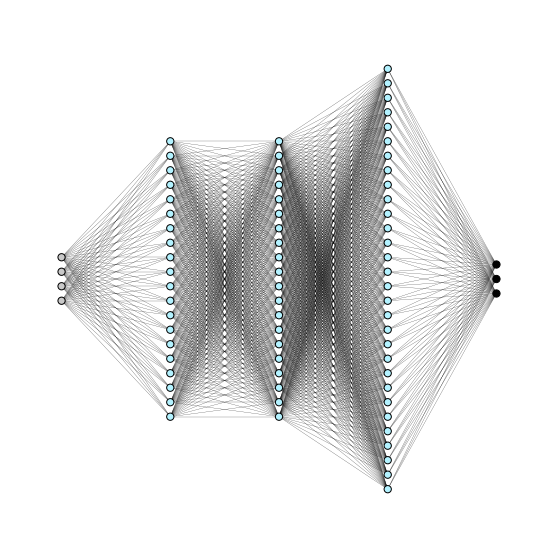

In [15]:
plot_network_arch(np.array(mlpc.network_structure)[:, 1], activations=None)

In [16]:
mlpc.y_unique_labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
mlpc.y_unique_encoding

array([0, 1, 2])

In [18]:
#mlpc.layer_weight_matrices

In [19]:
mlpc.layer_biases

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0.]])]

In [30]:
def relu_derivative(x):
    return 1 * (x > 0)

In [34]:
relu_derivative(3)

1


In [51]:
def relu(z):
    return np.max([0, x])

In [52]:
relu(33)

33


In [ ]:
import numpy as np

class NeuralNetwork():
    
    def __init__(self):
        # Seed the random number generator
        np.random.seed(1)

        # Set synaptic weights to a 3x1 matrix,
        # with values from -1 to 1 and mean 0
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1

    def sigmoid(self, x):
        """
        Takes in weighted sum of the inputs and normalizes
        them through between 0 and 1 through a sigmoid function
        """
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """
        The derivative of the sigmoid function used to
        calculate necessary weight adjustments
        """
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations):
        """
        We train the model through trial and error, adjusting the
        synaptic weights each time to get a better result
        """
        for iteration in range(training_iterations):
            # Pass training set through the neural network
            output = self.think(training_inputs)

            # Calculate the error rate
            error = training_outputs - output

            # Multiply error by input and gradient of the sigmoid function
            # Less confident weights are adjusted more through the nature of the function
            adjustments = np.dot(training_inputs.T, error * self.sigmoid_derivative(output))

            # Adjust synaptic weights
            self.synaptic_weights += adjustments

    def think(self, inputs):
        """
        Pass inputs through the neural network to get output
        """
        
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        return output


if __name__ == "__main__":

    # Initialize the single neuron neural network
    neural_network = NeuralNetwork()

    print("Random starting synaptic weights: ")
    print(neural_network.synaptic_weights)

    # The training set, with 4 examples consisting of 3
    # input values and 1 output value
    training_inputs = np.array([[0,0,1],
                                [1,1,1],
                                [1,0,1],
                                [0,1,1]])

    training_outputs = np.array([[0,1,1,0]]).T

    # Train the neural network
    neural_network.train(training_inputs, training_outputs, 10000)

    print("Synaptic weights after training: ")
    print(neural_network.synaptic_weights)

    A = str(input("Input 1: "))
    B = str(input("Input 2: "))
    C = str(input("Input 3: "))
    
    print("New situation: input data = ", A, B, C)
    print("Output data: ")
    print(neural_network.think(np.array([A, B, C])))